# Kickstarter Projects Python Code

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
from scipy.stats import uniform as sp_rand
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# for figures to show up in the notebook:
init_notebook_mode(connected=True) 

In [3]:
np.random.seed(101)

In [4]:
# Set plotting styles
sns.set_style('white')  

In [72]:
# Machine learning libraries:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/langwang/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
import warnings 
warnings.simplefilter('ignore')

----
## Get the data

In [7]:
df = pd.read_csv('ks-projects-201801.csv', encoding="ISO-8859-1")

In [8]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


----
## Data Cleaning

In [10]:
# Drop duplicate data
df = df.drop_duplicates()

In [11]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [12]:
# Subset the df with all the columns I want.
df = df[['name', 'category', 'main_category', 'launched', 'deadline', 'currency', 
         'usd_goal_real', 'usd_pledged_real', 'backers', 'state']]

In [13]:
# Where are all the NaN values for each column?
df.isnull().sum()

name                4
category            0
main_category       0
launched            0
deadline            0
currency            0
usd_goal_real       0
usd_pledged_real    0
backers             0
state               0
dtype: int64

In [14]:
# Drop the 4 rows that have NaN value in the 'name' column.
df.dropna(inplace=True)

In [15]:
# Rename some columns
df.rename(columns={'usd_goal_real':'goal', 'usd_pledged_real':'pledged'}, inplace=True) 

In [16]:
df.head(2)

,name,category,main_category,launched,deadline,currency,goal,pledged,backers,state
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-08-11 12:12:28,2015-10-09,GBP,1533.95,0.0,0,failed
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-09-02 04:43:57,2017-11-01,USD,30000.00,2421.0,15,failed


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378657 entries, 0 to 378660
Data columns (total 10 columns):
name             378657 non-null object
category         378657 non-null object
main_category    378657 non-null object
launched         378657 non-null object
deadline         378657 non-null object
currency         378657 non-null object
goal             378657 non-null float64
pledged          378657 non-null float64
backers          378657 non-null int64
state            378657 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 31.8+ MB


In [18]:
df.isnull().sum()

name             0
category         0
main_category    0
launched         0
deadline         0
currency         0
goal             0
pledged          0
backers          0
state            0
dtype: int64

In [19]:
# df['state'] is the target column. 
df['state'].value_counts()

failed        197716
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1845
Name: state, dtype: int64

In [20]:
# Only keep rows of the df that are either 'failed' or 'successful' in the 'state' column.
df = df[(df['state']=='failed') | (df['state']=='successful')]

In [21]:
df['state'].value_counts()

failed        197716
successful    133956
Name: state, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331672 entries, 0 to 378660
Data columns (total 10 columns):
name             331672 non-null object
category         331672 non-null object
main_category    331672 non-null object
launched         331672 non-null object
deadline         331672 non-null object
currency         331672 non-null object
goal             331672 non-null float64
pledged          331672 non-null float64
backers          331672 non-null int64
state            331672 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 27.8+ MB


In [23]:
# Change 'launched' column into a DateTime object
df['launched'] =  pd.to_datetime(df['launched'], format='%Y-%m-%d %H:%M:%S')

In [24]:
# Do a feature engineering on the DateTime column to return date only
def feature_1(col):
    date_time = col[0]
    return date_time.date()

In [25]:
# Apply to the 'launched' column
df['launched'] = df[['launched']].apply(feature_1, axis=1)

In [26]:
# Check
type(df['launched'][0])

datetime.date

In [27]:
# Do the same thing with the 'deadline' column
df['deadline'] =  pd.to_datetime(df['deadline'])

In [28]:
df['deadline'] = df[['deadline']].apply(feature_1, axis=1)

In [29]:
# type(df['deadline'][0])

In [30]:
# Compute new column 'days'
df['days'] = df['deadline'] - df['launched']

In [31]:
# Do a feature engineering on the DateTime column to return number of days only.
def feature_2(col):
    date_time = col[0]
    return date_time.days

In [32]:
df['days'] = df[['days']].apply(feature_2, axis=1)

In [33]:
# df['days']

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331672 entries, 0 to 378660
Data columns (total 11 columns):
name             331672 non-null object
category         331672 non-null object
main_category    331672 non-null object
launched         331672 non-null object
deadline         331672 non-null object
currency         331672 non-null object
goal             331672 non-null float64
pledged          331672 non-null float64
backers          331672 non-null int64
state            331672 non-null object
days             331672 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 40.4+ MB


In [35]:
df.head()

,name,category,main_category,launched,deadline,currency,goal,pledged,backers,state,days
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-08-11,2015-10-09,GBP,1533.95,0.0,0,failed,59
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-09-02,2017-11-01,USD,30000.00,2421.0,15,failed,60
2,Where is Hank?,Narrative Film,Film & Video,2013-01-12,2013-02-26,USD,45000.00,220.0,3,failed,45
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-03-17,2012-04-16,USD,5000.00,1.0,1,failed,30
5,Monarch Espresso Bar,Restaurants,Food,2016-02-26,2016-04-01,USD,50000.00,52375.0,224,successful,35


----
## Outliers

In [36]:
round(df.describe(), 1)

,goal,pledged,backers,days
count,331672.0,331672.0,331672.0,331672.0
mean,41509.7,9943.5,116.4,34.0
std,1108934.6,96733.4,965.4,12.7
min,0.0,0.0,0.0,1.0
25%,2000.0,50.0,2.0,30.0
50%,5000.0,788.0,15.0,30.0
75%,15000.0,4608.0,63.0,36.0
max,166361390.7,20338986.3,219382.0,92.0


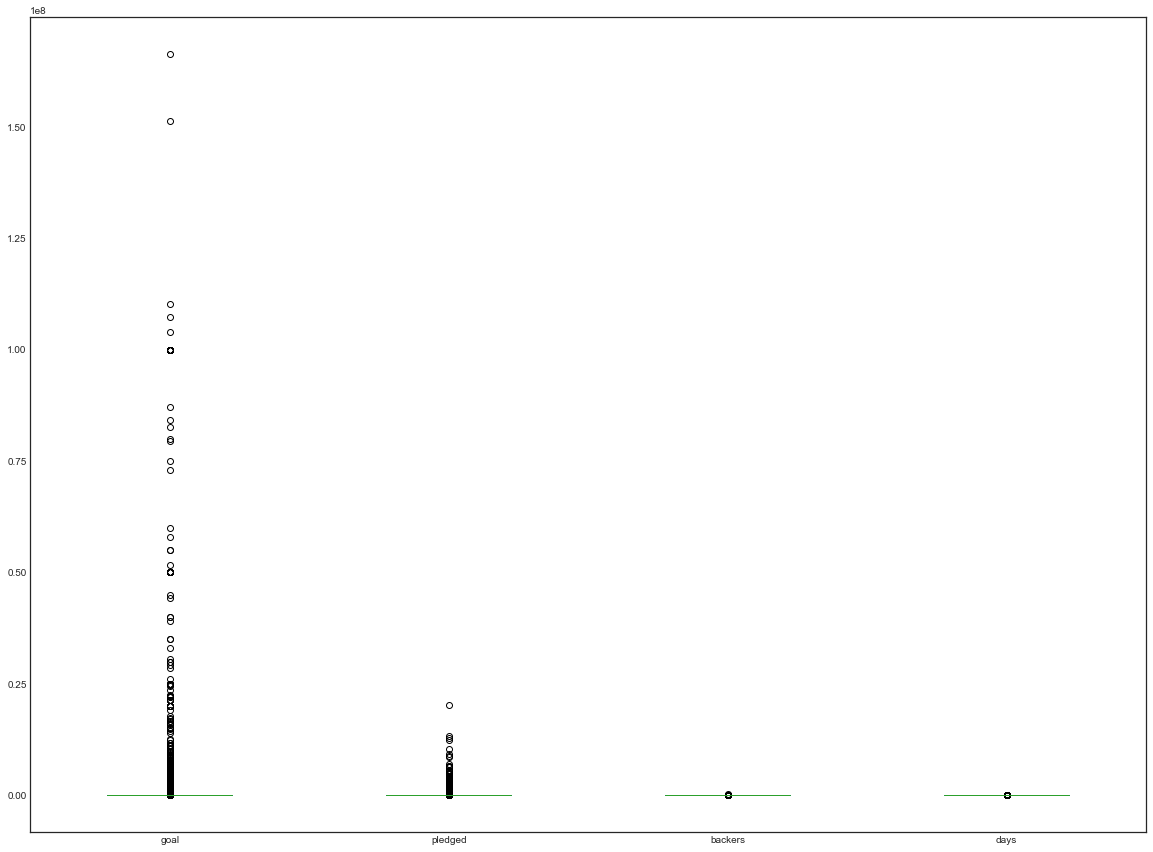

In [37]:
df.plot.box(figsize=(20,15))
 

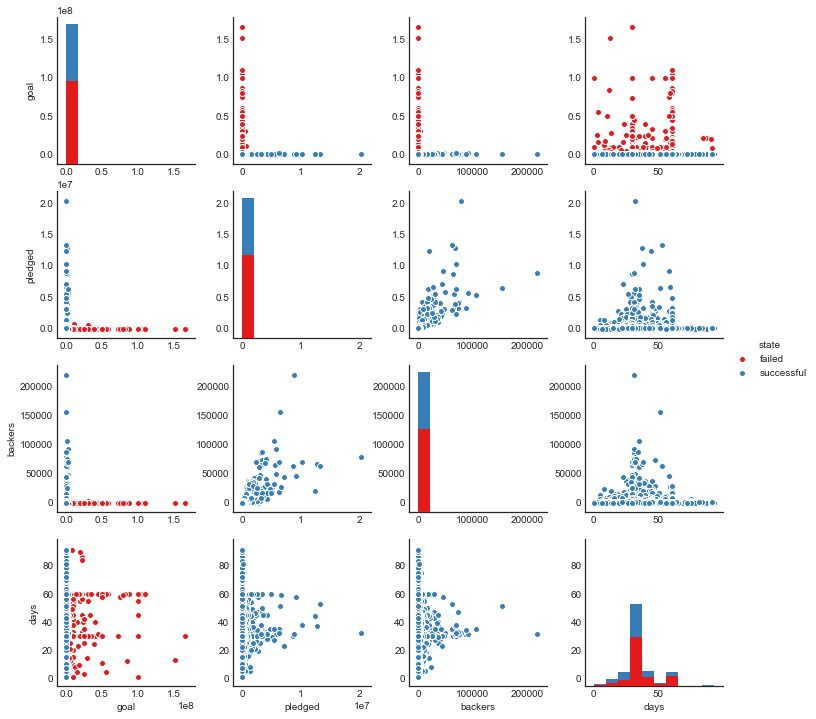

In [38]:
# Do a pairplot on the numberic columns of the data frame
sns.pairplot(df, hue='state', palette='Set1')


In [39]:
# We can see from the pairplot that columns 'goal', 'pledged' and 'backers' are heavily-skewed.

In [40]:
# Make a function to detect outliers with IQR constant being 1000.
def remove_outliers(x, outlier_constant=1000):
    
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    iqr = (upper_quartile - lower_quartile) * outlier_constant
    quartile_set = (lower_quartile - iqr, upper_quartile + iqr)
    outlier_list = []
    
    for y in a.tolist():
        if y < quartile_set[0] or y > quartile_set[1]:
            outlier_list.append(y)
    print(quartile_set)
    print('')
    print(outlier_list)
    return quartile_set

In [57]:
# Check outliers for the 'goal' column
goal_set = remove_outliers(df.goal)

(-12998000.0, 13015000.0)

[17104542.97, 33000000.0, 100000000.0, 100000000.0, 50000000.0, 73000000.0, 20000000.0, 51647023.58, 166361390.71, 100000000.0, 15000000.0, 21474836.0, 22000000.0, 84300785.2, 100000000.0, 100000000.0, 100000000.0, 50000000.0, 50000000.0, 15000000.0, 87092840.97, 16250000.0, 20000000.0, 55000000.0, 40000000.0, 29242486.89, 44336067.39, 79478620.25, 16000000.0, 21474836.47, 100000000.0, 100000000.0, 25000000.0, 45000000.0, 50000000.0, 14787430.68, 60000000.0, 21474836.0, 35000000.0, 22250000.0, 58000000.0, 151395869.92, 30000000.0, 26000000.0, 20000000.0, 50000000.0, 22327409.13, 75000000.0, 100000000.0, 100000000.0, 100000000.0, 100000000.0, 40000000.0, 107369867.72, 104057189.83, 50000000.0, 15000000.0, 30488734.41, 55000000.0, 82624142.77, 16610000.0, 23564157.35, 35000000.0, 28530019.29, 100000000.0, 100000000.0, 16610000.0, 25000000.0, 25000000.0, 22500000.0, 22000000.0, 14332191.54, 21474836.0, 80000000.0, 100000000.0, 20000000.0, 21474836.47, 19136558.4

In [58]:
# Check outliers for the 'pledged' column
pledged_set = remove_outliers(df.pledged)

(-4557950.0, 4562608.0)

[5020667.05, 8596474.58, 5545991.7, 6225354.98, 6465690.3, 5764229.38, 5333792.84, 5702153.38, 20338986.27, 5004494.58, 8782571.99, 12779843.49, 13285226.36, 6565782.5, 10266845.74, 12393139.69, 4729263.13, 5408916.95, 9192055.66, 5494492.81, 7072757.0, 4869472.2, 6333295.77]


In [59]:
# Check outliers for the 'backers' column
backers_set = remove_outliers(df.backers)

(-60998.0, 61063.0)

[63416, 64867, 85581, 73206, 154926, 63758, 91585, 78471, 87142, 219382, 61290, 70122, 66673, 74405, 62642, 73986, 68929, 105857, 67226, 69320]


In [60]:
# Check outliers for the 'day' column
days_set = remove_outliers(df.days)

(-5970.0, 6036.0)

[]


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331672 entries, 0 to 378660
Data columns (total 11 columns):
name             331672 non-null object
category         331672 non-null object
main_category    331672 non-null object
launched         331672 non-null object
deadline         331672 non-null object
currency         331672 non-null object
goal             331672 non-null float64
pledged          331672 non-null float64
backers          331672 non-null int64
state            331672 non-null object
days             331672 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 40.4+ MB


In [61]:
# Make a data frame 'df_clean', which is a data frame without all the outliers.
df_clean = df[(df.goal >= goal_set[0]) & (df.goal <= goal_set[1]) & 
              (df.pledged >= pledged_set[0]) & (df.pledged <= pledged_set[1]) &  
              (df.backers >= backers_set[0]) & (df.backers <= backers_set[1]) &  
              (df.days >= days_set[0]) & (df.days <= days_set[1])]


In [62]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331539 entries, 0 to 378660
Data columns (total 11 columns):
name             331539 non-null object
category         331539 non-null object
main_category    331539 non-null object
launched         331539 non-null object
deadline         331539 non-null object
currency         331539 non-null object
goal             331539 non-null float64
pledged          331539 non-null float64
backers          331539 non-null int64
state            331539 non-null object
days             331539 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 30.4+ MB


In [63]:
df_clean.describe()

,goal,pledged,backers,days
count,3.315390e+05,3.315390e+05,331539.000000,331539.000000
mean,2.582752e+04,9.307424e+03,110.242309,33.951402
std,1.974988e+05,6.164082e+04,615.786989,12.709863
min,1.000000e-02,0.000000e+00,0.000000,1.000000
25%,2.000000e+03,5.000000e+01,2.000000,30.000000
50%,5.000000e+03,7.890000e+02,15.000000,30.000000
75%,1.500000e+04,4.607000e+03,63.000000,36.000000
max,1.264302e+07,4.236618e+06,46520.000000,92.000000


In [49]:
# Since columns 'goal', 'pledged' and 'backers' are heavily-skewed, I decide to include the outliers 
# in my following data exploration and analysis.

----
## Exploratory Data Analysis

#### Step 1: Overall Data Visualization

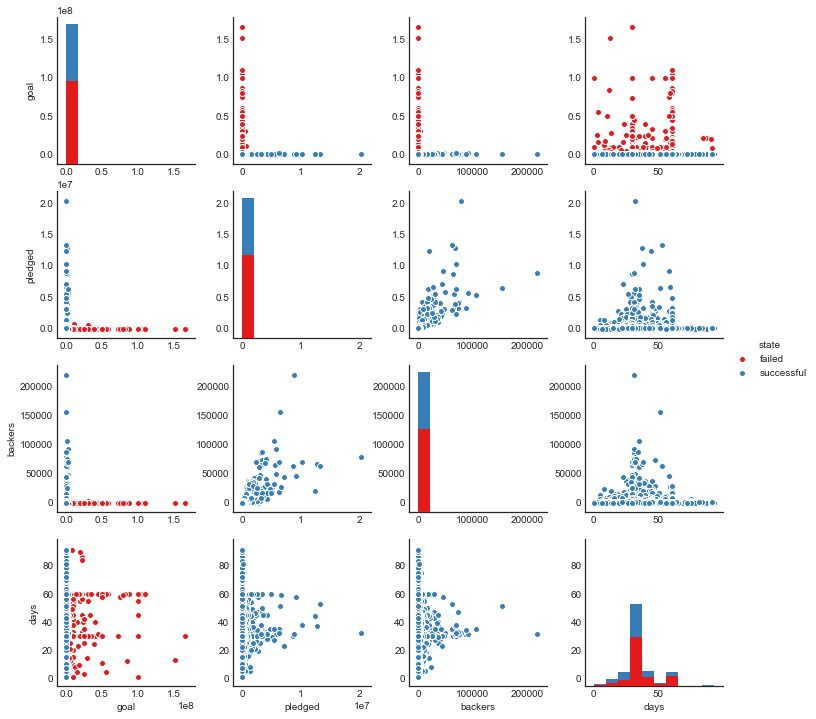

In [122]:
sns.pairplot(df, hue='state', palette='Set1')


In [70]:
# Some comments about the pairplot.
# heavily-skewed data for columns 'goal', 'pledged', 'backers'. 
# So when I do exploratory analysis on these columns, best to use median instead of mean.

In [127]:
# Make a correlation heatmap
df_drop = df.drop('state', axis = 1) 
df_corr = df_drop.corr()
df_corr

,goal,pledged,backers,days
goal,1.000000,0.006354,0.005208,0.021606
pledged,0.006354,1.000000,0.752291,0.008652
backers,0.005208,0.752291,1.000000,-0.000049
days,0.021606,0.008652,-0.000049,1.000000


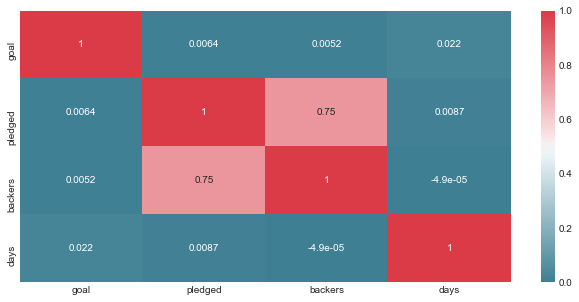

In [128]:
# Set up the matplotlib figure:
f, ax = plt.subplots(figsize=(11, 5))

# Generate a custom diverging colormap:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_corr, annot=True, cmap=cmap, xticklabels=df_corr.columns, yticklabels=df_corr.columns)


In [ ]:
# Some comments about the heatmap:
# Columns 'pledged' and 'backers' have a strong positive correlation, which is not surprising.
# Pairings such as 'goal' and 'pledged', 'goal' and 'backers' have approximately zero correlation.
# column 'days' have approximately zero correlation with columns 'goal' and 'pledged', 
# but a negative correlation with column 'backers'.

----
#### Step 2: Failed v.s Successful Visualizations

Text(0.5,1,'Failed v.s Successful Kickstarter Projects')

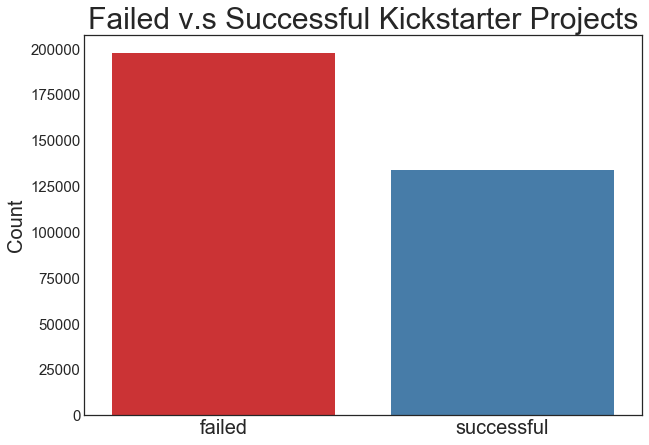

In [135]:
# Number of Failed and Successful Kickstarter Projects
plt.figure(figsize=(10,7))
sns.countplot(df['state'], palette='Set1')
plt.xticks(rotation=0, fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel('')
plt.ylabel('Count', fontsize=20)
plt.title('Failed v.s Successful Kickstarter Projects', fontsize=30)

Text(0.5,1,'Failed v.s Successful Kickstarter Projects by Currency')

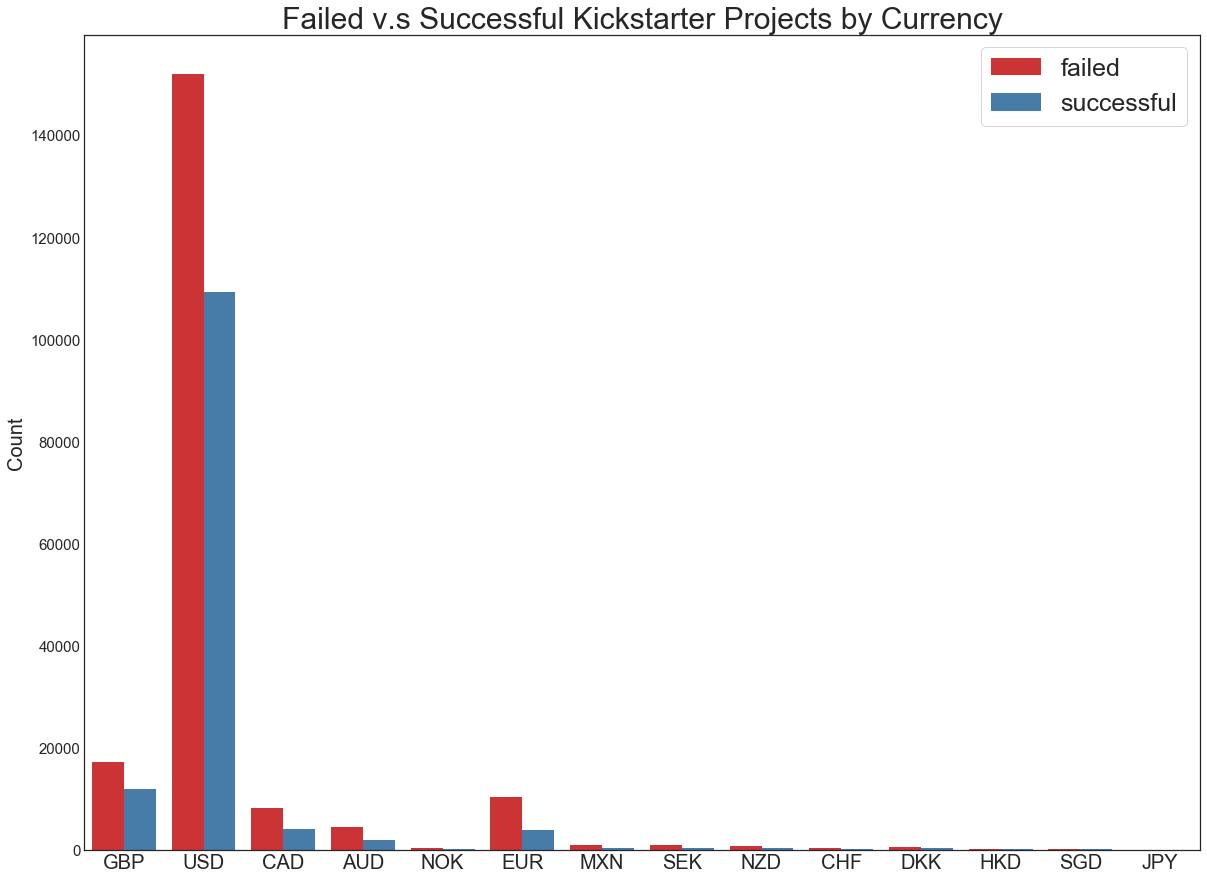

In [170]:
# Number of Failed and Successful Kickstarter Projects by Currency
plt.figure(figsize=(20,15))
sns.countplot('currency', hue='state', dodge=True, data=df, palette='Set1')
plt.legend(loc='best', frameon=True, fontsize=25)
plt.xticks(rotation=0, fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel('')
plt.ylabel('Count', fontsize=20)
plt.title('Failed v.s Successful Kickstarter Projects by Currency', fontsize=30)


In [53]:
df_state_median = df.groupby('state')[['goal', 'pledged', 'backers', 'days']].median().reset_index()
df_state_median

,state,goal,pledged,backers,days
0,failed,7500.00,100.00,3,30
1,successful,3837.74,5107.25,71,30


Text(0.5,1,'Failed v.s Successful Kickstarter Projects by Median Goal and Pledged Amounts')

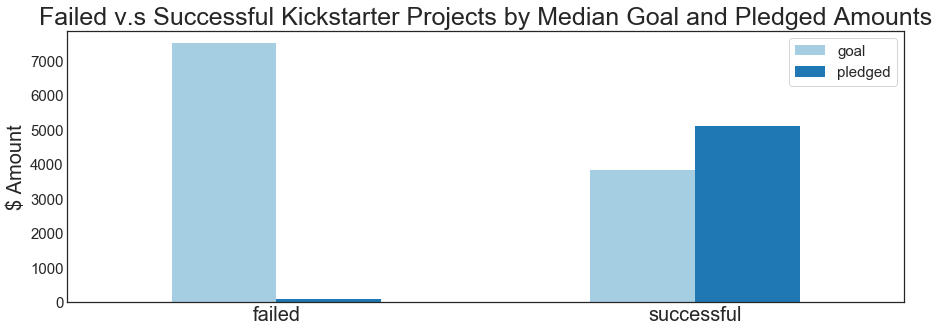

In [159]:
# Failed v.s Successful Kickstarter Projects by Median Goal and Pledged Amounts
df_state_median.plot.bar(x='state', y=['goal', 'pledged'], stacked=False, figsize=(15,5), 
                         color=sns.color_palette('Paired'))
plt.legend(loc='best', frameon=True, fontsize=15)
plt.xticks(rotation=0, fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel('')
plt.ylabel('$ Amount', fontsize=20)
plt.title('Failed v.s Successful Kickstarter Projects by Median Goal and Pledged Amounts', fontsize=25)


Text(0.5,1,'Failed v.s Successful Kickstarter Projects by Median Number of Backers')

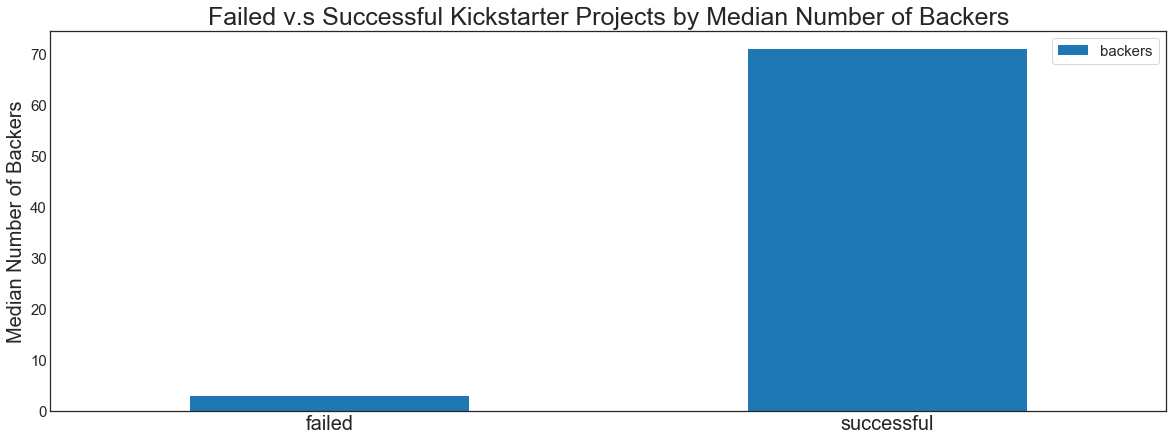

In [161]:
# Failed v.s Successful Kickstarter Projects by Median Number of Backers
df_state_median.plot.bar(x='state', y='backers', stacked=True, figsize=(20,7))
plt.legend(loc='best', frameon=True, fontsize=15)
plt.xticks(rotation=0, fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel('')
plt.ylabel('Median Number of Backers', fontsize=20)
plt.title('Failed v.s Successful Kickstarter Projects by Median Number of Backers', fontsize=25)


----
#### Step 3: Visualizations by Categories

Text(0.5,1,'Failed v.s Successful Kickstarter Projects by Category')

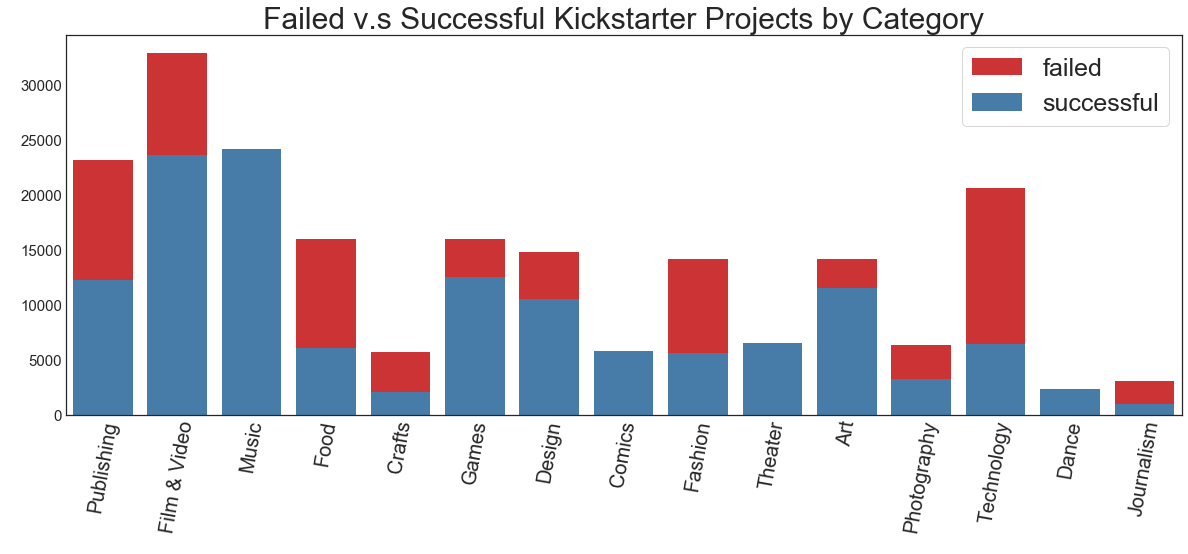

In [137]:
# Number of Failed and Successful Kickstarter Projects by Category
plt.figure(figsize=(20,7))
sns.countplot('main_category', hue='state', dodge=False, data=df, palette='Set1')
plt.legend(loc='best', frameon=True, fontsize=25)
plt.xticks(rotation=80, fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel(' ')
plt.ylabel('Count', fontsize=20)
plt.title('Failed v.s Successful Kickstarter Projects by Category', fontsize=30)

In [162]:
df_category_median = df.groupby('main_category')[['goal', 'pledged', 'backers', 'days']].median().reset_index()
df_category_median


,main_category,goal,pledged,backers,days
0,Art,2963.845,537.00,12,30
1,Comics,3500.000,1735.00,46,30
2,Crafts,2176.060,109.63,4,30
3,Dance,3200.000,2040.00,29,30
4,Design,10000.000,2279.00,34,30
5,Fashion,5500.000,293.89,6,30
6,Film & Video,6400.000,963.84,15,30
7,Food,10000.000,323.00,7,30
8,Games,7500.000,1743.00,40,30
9,Journalism,5000.000,75.00,3,30


Text(0.5,1,'Goal v.s Pledged Median Amount by Category')

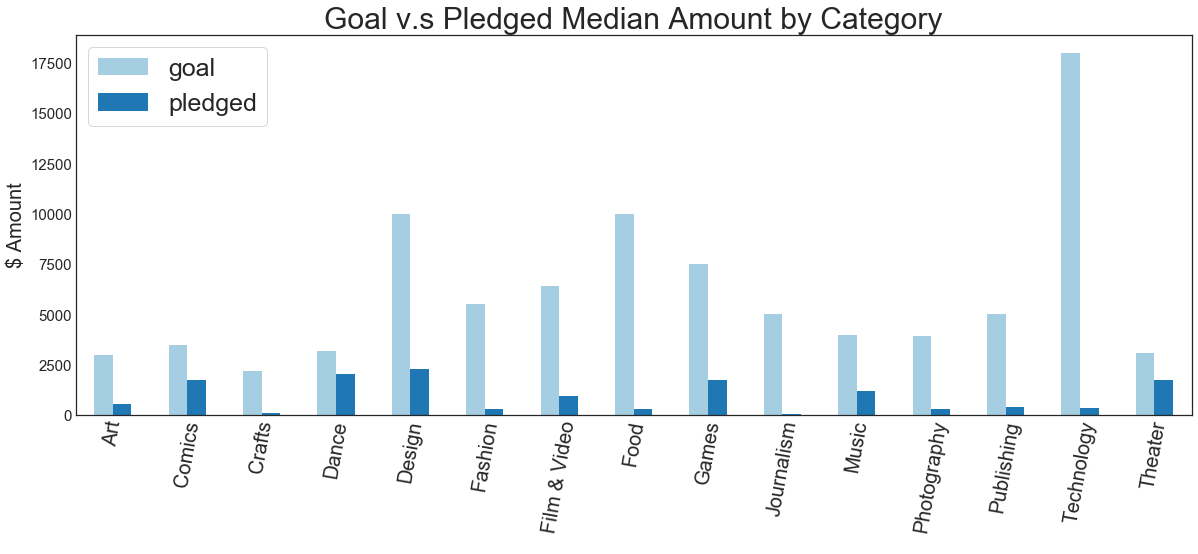

In [164]:
# Goal v.s Pledged Median Amount by Category
df_category_median.plot.bar(x='main_category', y=['goal', 'pledged'], stacked=False, 
                     color=sns.color_palette('Paired'), figsize=(20,7))
plt.legend(loc='best', frameon=True, fontsize=25)
plt.xticks(rotation=80, fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel(' ')
plt.ylabel('$ Amount', fontsize=20)
plt.title('Goal v.s Pledged Median Amount by Category', fontsize=30)

Text(0.5,1,'Median Number of Backers by Category')

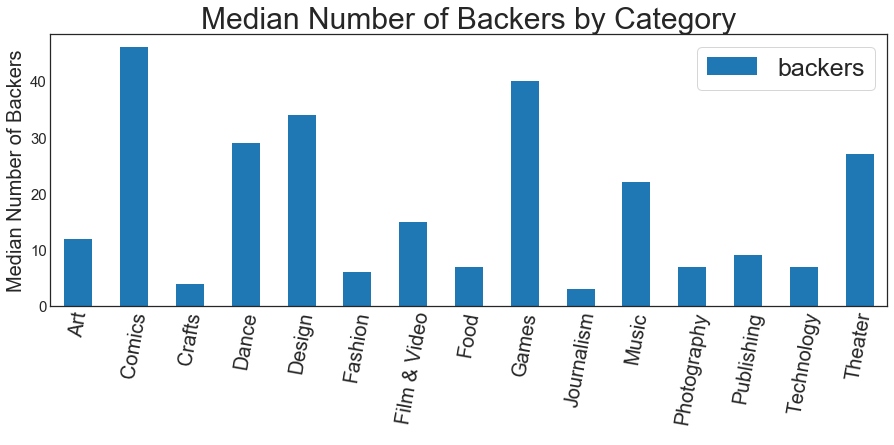

In [169]:
# Median Number of Backers by Category
df_category_median.plot.bar(x='main_category', y='backers', figsize=(15,5))
plt.legend(loc='best', frameon=True, fontsize=25)
plt.xticks(rotation=80, fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel(' ')
plt.ylabel('Median Number of Backers', fontsize=20)
plt.title('Median Number of Backers by Category', fontsize=30)


----
## Machine Learning

Use Random Forest to do feature selections and also use Random Forest to predict 
whether a kickstarter project will succeed or fail.


In [36]:
# Change 'successful' to '1' and 'failed' to '0'
# Use Broadcasting
df.loc[df['state']=='successful', 'state'] = 1
df.loc[df['state']=='failed', 'state'] = 0

In [37]:
# Change the 'state' column's data type to integer
df['state'] = df['state'].astype(int)

In [38]:
dfm1 = df.drop(['name', 'main_category', 'launched', 'pledged', 'deadline'], axis=1)

In [39]:
dfm1.isnull().sum()

category    0
currency    0
goal        0
backers     0
state       0
days        0
dtype: int64

In [40]:
corr = dfm1.corr()

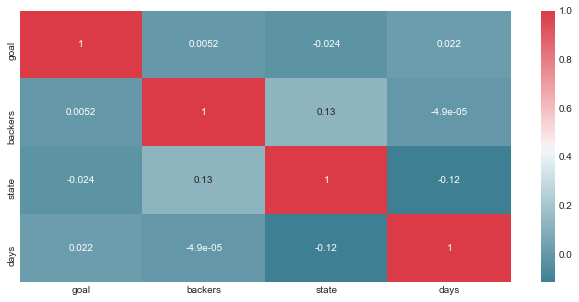

In [64]:
# Make a correlation heatmap

# Set up the matplotlib figure:
f, ax = plt.subplots(figsize=(11, 5))

# Generate a custom diverging colormap:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap, xticklabels=corr.columns, yticklabels=corr.columns)


In [683]:
# In theory, multicollinearity is not a problem for Random Forest.

In [41]:
# Make dummy variables
category_dum = pd.get_dummies(dfm1['category'], drop_first=True)
currency_dum = pd.get_dummies(dfm1['currency'], drop_first=True)

In [42]:
dfm1.drop(['category','currency'], axis=1, inplace=True)

In [43]:
dfm2 = pd.concat([dfm1, category_dum, currency_dum], axis=1)

In [44]:
dfm2.head()

,goal,backers,state,days,Academic,Accessories,Action,Animals,Animation,Anthologies,...,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
0,1533.95,0,0,59,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,30000.00,15,0,60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,45000.00,3,0,45,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5000.00,1,0,30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,50000.00,224,1,35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
# Features
X = dfm2.drop('state', axis=1)
X.head()

,goal,backers,days,Academic,Accessories,Action,Animals,Animation,Anthologies,Apparel,...,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
0,1533.95,0,59,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,30000.00,15,60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,45000.00,3,45,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5000.00,1,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,50000.00,224,35,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
# Target
y = dfm2['state']
y.head()

0    0
1    0
2    0
3    0
5    1
Name: state, dtype: int64

In [47]:
y.value_counts()

0    197716
1    133956
Name: state, dtype: int64

In [72]:
# Make a pipeline
pipe = make_pipeline(RandomForestClassifier(random_state=101)) 
pipe

Pipeline(memory=None,
     steps=[('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False))])

In [ ]:
# It's very computationally-expensive to do a randomized or full grid search. 
# So I will just fit my data with default model parameters.
# I demonstrated how to do a grid search for optimal parameters in my previous
# capstone project: Global Terrorism. (Also available on my GitHub.)

In [73]:
# Compute predicted y's (y_hat)
predicted = cross_val_predict(pipe, X, y, cv=3, n_jobs=-1)
predicted

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
# Classification table
print(classification_report(y, predicted))

             precision    recall  f1-score   support

          0       0.93      0.94      0.93    197716
          1       0.91      0.90      0.90    133956

avg / total       0.92      0.92      0.92    331672



In [75]:
# Confusion table
print(confusion_matrix(y, predicted))

[[185538  12178]
 [ 13632 120324]]


In [76]:
# Are all the features important for making the prediction?
# Use Random Forest to evaluate the importance of features on the classification task.
names = X.columns
rf = RandomForestClassifier()
rf.fit(X, y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.68799999999999994, 'backers'), (0.15670000000000001, 'goal'), (0.048899999999999999, 'days'), (0.0074999999999999997, 'Tabletop Games'), (0.0038, 'Apps'), (0.0037000000000000002, 'Theater'), (0.0032000000000000002, 'Video Games'), (0.0032000000000000002, 'Shorts'), (0.0030000000000000001, 'Web'), (0.0028999999999999998, 'USD'), (0.0025000000000000001, 'Product Design'), (0.0023, 'Indie Rock'), (0.0020999999999999999, 'Country & Folk'), (0.0019, 'GBP'), (0.0016999999999999999, 'Apparel'), (0.0016000000000000001, 'EUR'), (0.0015, 'Music'), (0.0015, 'Documentary'), (0.0015, 'Dance'), (0.0014, 'Food'), (0.0014, 'Fiction'), (0.0012999999999999999, 'Rock'), (0.0012999999999999999, 'Classical Music'), (0.0012999999999999999, 'CAD'), (0.0011999999999999999, 'Technology'), (0.0011999999999999999, 'Film & Video'), (0.0011999999999999999, 'Fashion'), (0.0011999999999999999, 'Comics'), (0.0011999999999999999, 'Art'), (0.0011000000000000001, 'Nonfiction'), (0.001

In [77]:
# Use only the first three most important features from the feature selection
 
dfm3 = dfm2[['backers', 'goal', 'days', 'state']]
dfm3.head()

,backers,goal,days,state
0,0,1533.95,59,0
1,15,30000.00,60,0
2,3,45000.00,45,0
3,1,5000.00,30,0
5,224,50000.00,35,1


In [78]:
# Features
X_3 = dfm3.drop('state', axis=1)
X_3.head()

,backers,goal,days
0,0,1533.95,59
1,15,30000.00,60
2,3,45000.00,45
3,1,5000.00,30
5,224,50000.00,35


In [79]:
# Target
y_3 = dfm3['state']
y_3.head()

0    0
1    0
2    0
3    0
5    1
Name: state, dtype: int64

In [80]:
# Make a pipeline
pipe_3 = make_pipeline(RandomForestClassifier(random_state=101)) 
pipe_3

Pipeline(memory=None,
     steps=[('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False))])

In [81]:
# Compute predicted y's (y_hat)
predicted_3 = cross_val_predict(pipe_3, X_3, y_3, cv=3, n_jobs=-1)
predicted_3

array([0, 0, 0, ..., 0, 0, 1])

In [82]:
# Classification table
print(classification_report(y_3, predicted_3))

             precision    recall  f1-score   support

          0       0.93      0.93      0.93    197716
          1       0.89      0.89      0.89    133956

avg / total       0.91      0.91      0.91    331672



In [83]:
# Confusion table
print(confusion_matrix(y_3, predicted_3))

[[182975  14741]
 [ 14287 119669]]


Now, let's try another algorithm: logistic regression and see how it performs.

In [48]:
# Make a logistic regression pipeline
pipe_4 = make_pipeline(LogisticRegression(random_state=101)) 
pipe_4

Pipeline(memory=None,
     steps=[('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=101, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [53]:
## Compute predicted y's (y_hat)
# predicted_4 = cross_val_predict(pipe_4, X, y, n_jobs=-1)
# predicted_4

In [54]:
# Too computationally expensive to compute predictions with the cross-validation method.
# So, I changed to a train-test split method to compute the predictions.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [55]:
pipe_4.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=101, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [56]:
predicted_4 = pipe_4.predict(X_test)

In [57]:
# classification table:
print(classification_report(y_test, predicted_4))

             precision    recall  f1-score   support

          0       0.89      0.96      0.92     59400
          1       0.93      0.83      0.88     40102

avg / total       0.91      0.91      0.91     99502



In [59]:
# Confusion table
print(confusion_matrix(y_test, predicted_4))

[[56766  2634]
 [ 6705 33397]]


----
## Text Classification using NLP  

The original dataset has a text-based column called 'name'.

Can I predict if a Kickstarter project will succeed or fail solely based on this 'name' column?

I will use NLP to convert text-based data into a numeric matrix, then use Naive Bayes classification
and Random Forest classification to do the predictions.

In [64]:
df.columns

Index(['name', 'category', 'main_category', 'launched', 'deadline', 'currency',
       'goal', 'pledged', 'backers', 'state', 'days'],
      dtype='object')

In [65]:
df.state.value_counts()

failed        197716
successful    133956
Name: state, dtype: int64

In [66]:
dfn = df[['name', 'state']]
dfn.head()

,name,state
0,The Songs of Adelaide & Abullah,failed
1,Greeting From Earth: ZGAC Arts Capsule For ET,failed
2,Where is Hank?,failed
3,ToshiCapital Rekordz Needs Help to Complete Album,failed
5,Monarch Espresso Bar,successful


In [67]:
dfn.groupby('state')[['name']].describe()

name                                       
             count  unique                       top freq
state                                                    
failed      197716  196761  New EP/Music Development   14
successful  133956  133562               Debut Album    5

In [68]:
# Make a new column to detect how long the names are:
dfn['length'] = dfn['name'].apply(len)
dfn.head()

,name,state,length
0,The Songs of Adelaide & Abullah,failed,31
1,Greeting From Earth: ZGAC Arts Capsule For ET,failed,45
2,Where is Hank?,failed,14
3,ToshiCapital Rekordz Needs Help to Complete Album,failed,49
5,Monarch Espresso Bar,successful,20


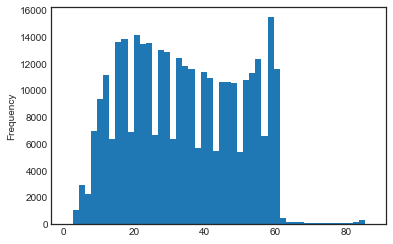

In [111]:
dfn['length'].plot(bins=50, kind='hist') 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a167ae5f8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a143cc2e8>], dtype=object)

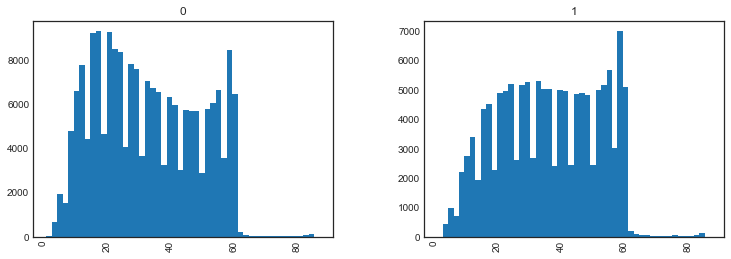

In [112]:
dfn.hist(column='length', by='state', bins=50, figsize=(12,4))

In [83]:
def text_preprocess(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return " ".join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [84]:
dfn['nltk_name'] = dfn['name'].apply(text_preprocess)

In [85]:
type(dfn['nltk_name'][0])

str

In [86]:
type(dfn['name'][0])

str

In [87]:
dfn.head(20)

,name,state,length,nltk_name
0,The Songs of Adelaide & Abullah,failed,31,Songs Adelaide Abullah
1,Greeting From Earth: ZGAC Arts Capsule For ET,failed,45,Greeting Earth ZGAC Arts Capsule ET
2,Where is Hank?,failed,14,Hank
3,ToshiCapital Rekordz Needs Help to Complete Album,failed,49,ToshiCapital Rekordz Needs Help Complete Album
5,Monarch Espresso Bar,successful,20,Monarch Espresso Bar
6,Support Solar Roasted Coffee & Green Energy! ...,successful,60,Support Solar Roasted Coffee Green Energy Sola...
7,Chaser Strips. Our Strips make Shots their B*tch!,failed,49,Chaser Strips Strips make Shots Btch
10,Of Jesus and Madmen,failed,19,Jesus Madmen
11,Lisa Lim New CD!,successful,16,Lisa Lim New CD
12,The Cottage Market,failed,18,Cottage Market


In [88]:
# Make a function to visualize the words in 'successful' and 'failed' projects.
def visualize(label):
  words = ''
  for msg in dfn[dfn['state'] == label]['nltk_name']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=1000, height=600).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

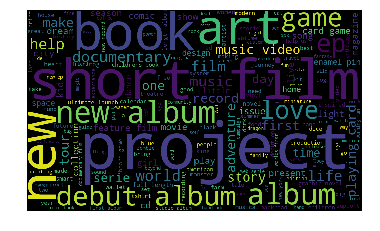

In [89]:
visualize('successful')

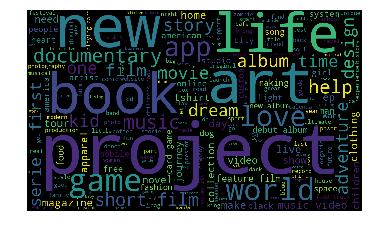

In [90]:
visualize('failed')

----
Predict whether a project will succeed or fail when the project gets listed:

In [43]:
X_n1 = dfn['name']
len(X_n1)

331672

In [44]:
# target:
y_n1 = dfn['state']

In [45]:
y_n1.value_counts()

failed        197716
successful    133956
Name: state, dtype: int64

In [844]:
# Use Naive Bayes classification
pipe3 = make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB())  
pipe3

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [459]:
predicted3 = cross_val_predict(pipe3, X_n1, y_n1, cv=3, n_jobs=-1)

In [460]:
# Classification table:
print(classification_report(y_n1, predicted3))

             precision    recall  f1-score   support

          0       0.67      0.94      0.78    238340
          1       0.64      0.18      0.29    133956

avg / total       0.66      0.67      0.61    372296



In [468]:
# Use Random Forest classification
pipe4 = make_pipeline(TfidfVectorizer(stop_words='english'), RandomForestClassifier())  
pipe4

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [473]:
# Too computationally expensive to compute predictions with the cross-validation method.
# predicted4 = cross_val_predict(pipe4, X_n1, y_n1, cv=3, n_jobs=-1)

In [474]:
# So, I changed to a train-test split method to compute the predictions.
X_train, X_test, y_train, y_test = train_test_split(X_n1, y_n1, test_size=0.3, random_state=101)

In [475]:
pipe4.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [476]:
predicted4 = pipe4.predict(X_test)

In [478]:
# classification table:
print(classification_report(y_test, predicted4))

             precision    recall  f1-score   support

          0       0.69      0.84      0.76     71645
          1       0.55      0.34      0.42     40044

avg / total       0.64      0.66      0.64    111689



In [ ]:
# As expected, predicting whether a Kickstarter project will succeed or fail solely based on 
# the 'name' column does not have as good a prediction power compared to what we've done eariler 
# with other columns.

----
## Recommendations for Investing in a New Project

My client is interested in investing in some kickstarter projects in the Film & video category. 
He wants some recommendations on which project he should invest in.

In [960]:
dfr = pd.read_csv('ks-projects-201801.csv', encoding="ISO-8859-1")

In [961]:
# Subset the df with all the columns I want.
dfr = dfr[['name', 'category', 'main_category',  
         'usd_goal_real', 'usd_pledged_real', 
         'backers', 'state']]

In [969]:
# Subset the data frame to 'Film & Video' only
dfr = dfr[dfr.main_category=='Film & Video']

In [970]:
# Drop duplicate data
dfr = dfr.drop_duplicates()

In [971]:
# Drop NaN values
dfr.dropna(inplace=True)

In [972]:
dfr.rename(columns={'usd_goal_real':'goal', 'usd_pledged_real':'pledged'}, inplace=True) 

In [973]:
# Add a column 'surplus'
dfr['surplus'] =  dfr['pledged'] - dfr['goal'] 
dfr['surplus'].head()

1    -27579.00
2    -44780.00
4    -18217.00
9    -58759.43
27    26860.99
Name: surplus, dtype: float64

In [974]:
# Subset the data frame to 'live' projects only (projects that people can still invest in)
dfr_live = dfr[dfr.state=='live']
dfr_live.head()

,name,category,main_category,goal,pledged,backers,state,surplus
183,KILOS.,Thrillers,Film & Video,5000.00,310.00,4,live,-4690.00
458,The Man in the Field,Horror,Film & Video,1159.38,563.32,11,live,-596.06
537,Dear Atlantas,Film & Video,Film & Video,2000.00,5.00,1,live,-1995.00
752,Durango Falls TV Show,Film & Video,Film & Video,10000.00,1.00,1,live,-9999.00
1920,MORE BIKE LIFE,Documentary,Film & Video,18372.07,0.00,0,live,-18372.07


In [977]:
# Sort 'live' projects by 'surplus' and 'backers'
dfr_sort = dfr_live.sort_values(by=['surplus', 'backers'], axis=0, ascending=False, na_position='first') 
dfr_sort.head(20)

,name,category,main_category,goal,pledged,backers,state,surplus
319442,MADE YOU LOOK,Shorts,Film & Video,3500.00,6204.00,81,live,2704.00
242907,The Whibbits! A stop motion animated web serie...,Animation,Film & Video,818.39,2482.44,30,live,1664.05
190837,LaVoy: Dead Man Talking,Documentary,Film & Video,12000.00,13450.00,125,live,1450.00
341218,CADABRA - A Short Film,Comedy,Film & Video,406.55,1599.09,7,live,1192.54
127730,The Walk,Film & Video,Film & Video,6775.80,7479.13,73,live,703.33
132682,"""BRIDGES"" a short doc about the in-betweeners",Documentary,Film & Video,7000.00,7656.00,56,live,656.00
314947,Lady (short film),Shorts,Film & Video,1295.78,1853.65,36,live,557.87
127532,Code Switch,Horror,Film & Video,3000.00,3511.00,27,live,511.00
246730,FATHOM | an Eco-Thriller,Shorts,Film & Video,6000.00,6452.00,35,live,452.00
43336,BEAT IT,Shorts,Film & Video,1355.16,1775.26,20,live,420.10


In [ ]:
# Obviously, my client should invest in projects that are already successful, i.e. live projects 
# that the pledged amount >= goal amount